# CPA on Blowfish

## Setup

In [1]:
SCOPETYPE     = 'OPENADC'
PLATFORM      = 'CWLITEARM'
CRYPTO_TARGET = 'TINYAES128C'
SS_VER        = 'SS_VER_1_1'

In [4]:
%run "Setup_Scripts/Setup_Generic.ipynb"

(ChipWhisperer NAEUSB WARNING|File naeusb.py:799) Your firmware (0.62) is outdated - latest is 0.65 See https://chipwhisperer.readthedocs.io/en/latest/firmware.html for more information


INFO: Found ChipWhisperer😍
scope.gain.mode                          changed from low                       to high                     
scope.gain.gain                          changed from 0                         to 30                       
scope.gain.db                            changed from 5.5                       to 24.8359375               
scope.adc.basic_mode                     changed from low                       to rising_edge              
scope.adc.samples                        changed from 24400                     to 5000                     
scope.adc.trig_count                     changed from 7703118                   to 31529815                 
scope.clock.adc_src                      changed from clkgen_x1                 to clkgen_x4                
scope.clock.adc_freq                     changed from 0                         to 372363281                
scope.clock.adc_rate                     changed from 0.0                       to 372363281.0       

In [5]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET" "$SS_VER"
cd ../hardware/victims/firmware/simpleserial-blowfish
make PLATFORM=$1 CRYPTO_TARGET=NONE SS_VER=$3 -j
#make clean

SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
make[1]: '.dep' is up to date.
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc (Arch Repository) 13.2.0
Copyright (C) 2023 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Assembling: .././hal/stm32f3/stm32f3_startup.S
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -x assembler-with-cpp -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -DF_CPU=7372800 -Wa,-gstabs,-adhlns=objdir-CWLITEARM/stm32f3_startup.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././simpleserial/ -I.././crypto/ .././hal/stm32f3/stm32f3_startup.S -o objdir-CWLITEARM/stm32f3_sta

/usr/lib/gcc/arm-none-eabi/13.2.0/../../../../arm-none-eabi/bin/ld: /usr/lib/gcc/arm-none-eabi/13.2.0/../../../../arm-none-eabi/lib/thumb/v7e-m/nofp/libg_nano.a(libc_a-closer.o): in function `_close_r':
/build/arm-none-eabi-newlib/src/build-nano/arm-none-eabi/thumb/v7e-m/nofp/newlib/../../../../../../newlib-4.3.0.20230120/newlib/libc/reent/closer.c:47:(.text._close_r+0xc): warning: _close is not implemented and will always fail
/usr/lib/gcc/arm-none-eabi/13.2.0/../../../../arm-none-eabi/bin/ld: /usr/lib/gcc/arm-none-eabi/13.2.0/../../../../arm-none-eabi/lib/thumb/v7e-m/nofp/libg_nano.a(libc_a-lseekr.o): in function `_lseek_r':
/build/arm-none-eabi-newlib/src/build-nano/arm-none-eabi/thumb/v7e-m/nofp/newlib/../../../../../../newlib-4.3.0.20230120/newlib/libc/reent/lseekr.c:49:(.text._lseek_r+0x10): warning: _lseek is not implemented and will always fail
/usr/lib/gcc/arm-none-eabi/13.2.0/../../../../arm-none-eabi/bin/ld: /usr/lib/gcc/arm-none-eabi/13.2.0/../../../../arm-none-eabi/lib/thu

.
Creating load file for Flash: simpleserial-blowfish-CWLITEARM.hex
arm-none-eabi-objcopy -O ihex -R .eeprom -R .fuse -R .lock -R .signature simpleserial-blowfish-CWLITEARM.elf simpleserial-blowfish-CWLITEARM.hex
.
Creating load file for EEPROM: simpleserial-blowfish-CWLITEARM.eep
arm-none-eabi-objcopy -j .eeprom --set-section-flags=.eeprom="alloc,load" \
--change-section-lma .eeprom=0 --no-change-warnings -O ihex simpleserial-blowfish-CWLITEARM.elf simpleserial-blowfish-CWLITEARM.eep || exit 0
.
Creating load file for Flash: simpleserial-blowfish-CWLITEARM.bin
arm-none-eabi-objcopy -O binary -R .eeprom -R .fuse -R .lock -R .signature simpleserial-blowfish-CWLITEARM.elf simpleserial-blowfish-CWLITEARM.bin
.
Creating Extended Listing: simpleserial-blowfish-CWLITEARM.lss
arm-none-eabi-objdump -h -S -z simpleserial-blowfish-CWLITEARM.elf > simpleserial-blowfish-CWLITEARM.lss
.
Creating Symbol Table: simpleserial-blowfish-CWLITEARM.sym
arm-none-eabi-nm -n simpleserial-blowfish-CWLITEARM.el

In [6]:
cw.program_target(scope, prog, "../hardware/victims/firmware/simpleserial-blowfish/simpleserial-blowfish-{}.hex".format(PLATFORM))

Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 11563 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 11563 bytes


In [7]:
# Locally compile the blowfish binary (used for the power model)
import subprocess
args = ("/usr/bin/gcc", "/home/simon/blowfish/blowfish.c", "/home/simon/blowfish/main.c", "-o", "/home/simon//blowfish/blowfish", "-lm")
rc = subprocess.call(args)
if rc != 0:
    print("Error compiling Blowfish")

## Generate Plaintexts

In [21]:
NO_OF_PLAINTEXTS = 1000
ATTACK_F = True  # whether we are attacking the result of f()

In [22]:
import random

plaintexts = []
if ATTACK_F:
    # in this case, the right half of the plaintext are the first 32 bits because of endianess
    left = [12, 132, 241, 104]   # insert the left half of one plaintext here
    right = [190, 21, 83, 101]    # remeber the original right half (will get overwritten)
    for _ in range(NO_OF_PLAINTEXTS):
        right = [random.randint(0, 255) for _ in range(4)]
        right.extend(left)
        plaintexts.append(right)
else:
    plaintexts = [[random.randint(0, 255) for _ in range(8)] for _ in range(NO_OF_PLAINTEXTS)]

In [24]:
#for p in plaintexts:
#    print(p)

### Get Hamming Weights

In [25]:
import numpy as np

hw_array = []

# when attacking the round keys via sbox lookups (assuming sboxes are known)
blowfish_arg = "feistel" if ATTACK_F else "sbox"
# when attacking XOR operations
#blowfish_arg = "feistel" if ATTACK_F else "xor"

for p in plaintexts:
    args = ("/home/simon/blowfish/blowfish", blowfish_arg,
            str(p[0]), str(p[1]), str(p[2]), str(p[3]), str(p[4]), str(p[5]), str(p[6]), str(p[7]))
    result = subprocess.run(args, capture_output=True)
    hw = [int(i) for i in result.stdout.decode().split()]
    hw_array.append(hw)

hw_array = np.array(hw_array)

## Measure Power Traces

In [26]:
scope.adc.samples = 4200
#scope.adc.offset = 500    # discards the first 500 samples
#scope.adc.decimate = 10

In [27]:
from tqdm.notebook import trange
import time

trace_array = []
for i in trange(NO_OF_PLAINTEXTS, desc='Capturing traces'):
    scope.arm()
    
    target.simpleserial_write('p', bytearray(plaintexts[i]))
    
    ret = scope.capture()
    if ret:
        print("Target timed out!")
        continue
    
    response = target.simpleserial_read('r', 8)
    #print(plaintexts[i], "\t", ["%02X" % i for i in response])
    
    trace_array.append(scope.get_last_trace())

trace_array = np.array(trace_array)

Capturing traces:   0%|          | 0/1000 [00:00<?, ?it/s]

## Calulcate Perason Correlation Coefficient

In [28]:
all_corrs = []

for i in range(256):
    corr = []
    for j in range(scope.adc.samples):
        trace_sample = trace_array[:, j]
        hw_sample = hw_array[:, i]

        pearson_corr = np.corrcoef(trace_sample, hw_sample)
        corr.append(abs(pearson_corr[0, 1]))
    all_corrs.append(corr)

all_corrs = np.array(all_corrs)
#all_corrs = np.transpose(all_corrs)

print("Done")

Done


In [29]:
# get the value with the highest correlation
key_guess = np.where(all_corrs == np.amax(all_corrs))

print("Keyguess %d (0x%X), index %d" % (key_guess[0][0], key_guess[0][0], key_guess[1][0]))

# print both key values when attacking XOR
print("Keyguesses: %d (0x%X) or %d (0x%X)" % (key_guess[0][0], key_guess[0][0], 255-key_guess[0][0], 255-key_guess[0][0]))

Keyguess 159 (0x9F), index 349
Keyguesses: 159 (0x9F) or 96 (0x60)


<IPython.core.display.Javascript object>


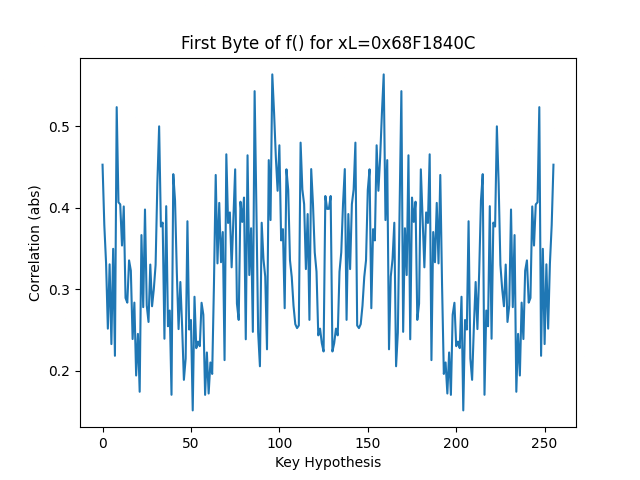

In [30]:
%matplotlib notebook
import matplotlib.pylab as plt

#px = 1/plt.rcParams['figure.dpi']
#plt.figure(figsize=(1024*px,768*px))

#plt.plot(trace_array[0])
plt.plot(np.max(all_corrs.T, axis=0))
plt.title("First Byte of f() for xL=0x68F1840C")
plt.ylabel("Correlation (abs)")
plt.xlabel("Key Hypothesis")

plt.show()

In [150]:
np.max(all_corrs.T, axis=0)[117]

0.250693207030994

In [31]:
scope.dis()
target.dis()

## Reverse Engineer Sboxes

Note: This code is not returning the expected results, but is still included to show our approach.

In [ ]:
from sage.all import *

R = IntegerModRing(2**32)

# results of f()
# Y = [0x61ED6F99, 0x10A8021F, 0x59E97934]
# Y = [0x936E4F71, 0xAC4F115B, 0x24DEE258]
Y = [0xB4F3496B, 0x74067BEE, 0x61ED6F99]

# convert endianess
# for i in a:
#     x = int.from_bytes(i.to_bytes(4, 'little'), 'big')
#     Y.append(x)

M = Matrix(R, [
    [1, 1, -2],
    [1, -2, 1],
    [-2, 1, 1]
])
b = vector(R, [
    Y[0] + Y[1] - 2*Y[2],
    Y[0] - 2*Y[1] + Y[2],
    -2*Y[0] + Y[1] + Y[2]
])
s = M.solve_right(b)

print(s)
print("expected value: %X" % 0x3D40B8A2)